# Proyecto 2 – Modelos de clasificación supervisada para evaluar la calidad de un automovil
# Oscar Daniel Roncancio Lucas

Durante el desarrollo de este laboratorio se importara un dataset que contiene información para determinar la calidad de un carro en base a distintos parametros. Inicialmente se realizará un análisis exploratorio de datos con el fin de identificar la estrutura del dataset, sus variables, como estan distribuidas, y determinar si el dataset necesita algún tipo de tratamiendo con base en lo que se analizó.

Una vez este análisis es llevado a cabo se desea implementar un modelo de ML que logre predecir adecuamente cual es la calidad de un carro. Para esto se entrenaran diversos modelos de ML con el fin de encontrar el mas acorde a la situación. Para determinar cual de estos modelos es el mejor se tendrán en cuenta distintas medidas de estadisticos de validación, entre estas estarán medidas como el accuracy, precision, recall, f1-score, learning curves y finalmente PR-AUC

# Índice
1. Análisis exploratorio de datos
    - Punto Número 4!!
    - Análisis de las variables (Categorización)
    - Tratamiento de datos (Detección de nulos, detección de duplicados, Encoding)
2. Split de entrenamiento
    - Punto Número 5!!
    - Separación de features y variable objetivo en el dataset
    - Creación del split (70/30)
    - Uso de SMOTE (Balanceo de datos)
3. Modelos de ML (Paso iterativo)
    - Punto Número 6!!
        - Se genera el modelo (Decision tree, random forest, Logistic regresion, KNN, GaussianNB, SVC, Gradient Boosting, neural Network)
    - Punto Número 7!!
        - En cada modelo se realiza el análisis de los estadisticos de validación
    - Punto Número 8!!
        - Reentrenamiento con un modelo distinto
        - Conclusión en cada modelo
4. Explicación final


# Análisis exploratorio de datos

## Punto Número 4: cargue la base data determine la cantidad de variables y registros, indique cuales son numéricas y cualitativas y haga un resumen de esa información.

### Importación de librerias

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Importación del dataset

In [3]:
#Importo la base de datos como se indica en el repositorio
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
car_evaluation = fetch_ucirepo(id=19) 
  
# data (as pandas dataframes) 
X = car_evaluation.data.features 
y = car_evaluation.data.targets 
df_car = pd.concat([X, y], axis=1)
# variable information 
print(car_evaluation.variables) 

       name     role         type demographic  \
0    buying  Feature  Categorical        None   
1     maint  Feature  Categorical        None   
2     doors  Feature  Categorical        None   
3   persons  Feature  Categorical        None   
4  lug_boot  Feature  Categorical        None   
5    safety  Feature  Categorical        None   
6     class   Target  Categorical        None   

                                         description units missing_values  
0                                       buying price  None             no  
1                           price of the maintenance  None             no  
2                                    number of doors  None             no  
3              capacity in terms of persons to carry  None             no  
4                           the size of luggage boot  None             no  
5                        estimated safety of the car  None             no  
6  evaulation level (unacceptable, acceptable, go...  None             no  

### Información del dataset

In [4]:
df_car.dtypes
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [5]:
df_car.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


In [6]:
display(df_car['buying'].value_counts())
display(df_car['maint'].value_counts())
display(df_car['doors'].value_counts())
display(df_car['persons'].value_counts())
display(df_car['lug_boot'].value_counts())
display(df_car['safety'].value_counts())
display(df_car['class'].value_counts())

buying
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64

maint
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64

doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64

persons
2       576
4       576
more    576
Name: count, dtype: int64

lug_boot
small    576
med      576
big      576
Name: count, dtype: int64

safety
low     576
med     576
high    576
Name: count, dtype: int64

class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64

Se evidencia un total de 7 variables y 1728 registros dentro del dataset, observando los valores de cada variable, podemos determinar que todas las variables son categóricas y por lo tanto cualitativas adicionalmente observamos un comportamiento interesante en la distribución de valores de cada variable, apartemente en todas las variables con excepción de la variable class, los valores se reparten de manera equitativa entre las distintas categorías que poseen, por otra parte observando la variable objetivo es decir class podemos ver un desbalance notorio, ya qu ela mayor cantidad de los datos está presente en la categoría unacc

### Tratamiento de datos

In [7]:
#Analisis de valores nulos
df_car.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

No existe ningún valor nulo y no tiene sentido realizar un análisis de valores duplicados, por lo que no será necesario realizar ningún ajuste a las variables por lo tanto se procedera a la división del data set para su entrenamiento y testeo

In [8]:
df_car

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


### Ordinal Encoding

In [9]:
df_final = df_car.copy()
#Realizaré Ordinal Encoding
df_final['buying'] = df_final['buying'].map({'vhigh': 4, 'high': 3, 'med': 2, 'low': 1})
df_final['maint'] = df_final['maint'].map({'vhigh': 4, 'high': 3, 'med': 2, 'low': 1})
df_final['doors'] = df_final['doors'].map({'2': 1, '3': 2, '4': 3, '5more': 4})
df_final['persons'] = df_final['persons'].map({'2': 1, '4': 2, 'more': 3})
df_final['lug_boot'] = df_final['lug_boot'].map({'small': 1, 'med': 2, 'big': 3})
df_final['safety'] = df_final['safety'].map({'low': 1, 'med': 2, 'high': 3})
df_final['class'] = df_final['class'].map({'unacc': 1, 'acc': 2, 'good': 3, 'vgood': 4})
display(df_final)

,buying,maint,doors,persons,lug_boot,safety,class
0,4,4,1,1,1,1,1
1,4,4,1,1,1,2,1
2,4,4,1,1,1,3,1
3,4,4,1,1,2,1,1
4,4,4,1,1,2,2,1
...,...,...,...,...,...,...,...
1723,1,1,4,3,2,2,3
1724,1,1,4,3,2,3,4
1725,1,1,4,3,3,1,1
1726,1,1,4,3,3,2,3


Para un mejor análisis decidí hacer Ordinal encoding, que es una buena estrategia para desglozar variables categoricas cuando se sabe que poseen un ranking, esto nos ayudara a generar mejores analisis con modelos de ML

In [10]:
df_final

,buying,maint,doors,persons,lug_boot,safety,class
0,4,4,1,1,1,1,1
1,4,4,1,1,1,2,1
2,4,4,1,1,1,3,1
3,4,4,1,1,2,1,1
4,4,4,1,1,2,2,1
...,...,...,...,...,...,...,...
1723,1,1,4,3,2,2,3
1724,1,1,4,3,2,3,4
1725,1,1,4,3,3,1,1
1726,1,1,4,3,3,2,3


### Split features y variable objetivo

## Punto número 5: haga una partición adecuada de la base para determinar entrenamiento y testeo.

Divido el data set en features y objective, para este caso la variable objetivo es class

In [11]:
X = df_final.drop('class', axis=1)
y = df_final['class']
display(X)
display(y)

,buying,maint,doors,persons,lug_boot,safety
0,4,4,1,1,1,1
1,4,4,1,1,1,2
2,4,4,1,1,1,3
3,4,4,1,1,2,1
4,4,4,1,1,2,2
...,...,...,...,...,...,...
1723,1,1,4,3,2,2
1724,1,1,4,3,2,3
1725,1,1,4,3,3,1
1726,1,1,4,3,3,2


0       1
1       1
2       1
3       1
4       1
       ..
1723    3
1724    4
1725    1
1726    3
1727    4
Name: class, Length: 1728, dtype: int64

Para iniciar importaremos las librerias necesarias para el procesamiento inicial y generaré el split de datos aplicando SMOTE al split de training

### Training split y balanceo con SMOTE

In [12]:
# Importando las bibliotecas necesarias
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, precision_recall_curve
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

# Dividir el conjunto de datos y entrenar el modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Aplicar SMOTE para balancear las clases
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)

Posteriormente generaré nuevamente un conteo general de los valores en cada variable para observar como fueron afectados por el cálculo hecho por SMOTE

In [13]:
display(X_train['buying'].value_counts())
display(X_train['maint'].value_counts())
display(X_train['doors'].value_counts())
display(X_train['persons'].value_counts())
display(X_train['lug_boot'].value_counts())
display(X_train['safety'].value_counts())
display(y_train.value_counts())

buying
1    1645
2     863
3     470
4     410
Name: count, dtype: int64

maint
1    1544
2     942
3     548
4     354
Name: count, dtype: int64

doors
3    919
2    901
1    836
4    732
Name: count, dtype: int64

persons
2    1643
3    1345
1     400
Name: count, dtype: int64

lug_boot
2    1350
3    1195
1     843
Name: count, dtype: int64

safety
3    1781
2    1196
1     411
Name: count, dtype: int64

class
1    847
4    847
2    847
3    847
Name: count, dtype: int64

Haciendo una revisión de los conteos podemos ver como SMOTE añadió una gran cantidad de valores al dataset con el proposito de balancear los dataset de entrenamiento

## Punto Número 6: Aplique varios modelos de aprendizaje y determine los reportes de clasificación del paquete scikit-learn.

Cabe destacar que realizaré el procedimiento de entrenamiento con 8 modelos de ML diferentes, y para todos realizaré lo siguientes pasos:
1. Uso de gridsearch para encontrar los mejores hiperparametros
2. Creación y entrenamiento del modelo
3. Feature importance (Si es posible para el modelo)
4. Se genera una predicción con el modelo
5. Estadisticos de validación
6. Matriz de confusión
7. Curvas de aprendizaje
8. PR curves y PR-AUC (si es posible para el modelo)

# Decision tree

### Uso de gridsearch

In [153]:
#Gridsearch para encontrar los mejores hiperparámetros para el modelo de decision tree
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Definir los hiperparámetros
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': np.arange(1,30),
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 5, 10, 15]
}

# Inicializar el modelo
dt = DecisionTreeClassifier(random_state=0)

# Inicializar GridSearch
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Entrenar el modelo
grid_search.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros
grid_search.best_params_



Fitting 5 folds for each of 1450 candidates, totalling 7250 fits


{'criterion': 'entropy',
 'max_depth': 12,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

### Creación del modelo

In [154]:
# instancio el modelo
modelo = DecisionTreeClassifier(criterion='entropy',max_depth=12, min_samples_leaf=1, min_samples_split=2, random_state=0)

# Entrenar el modelo
modelo.fit(X_train, y_train)

# Evaluar el modelo
y_pred = modelo.predict(X_test)
print(f"Exactitud del modelo: {accuracy_score(y_test, y_pred):.2f}")

Exactitud del modelo: 0.97


### Feature Importance

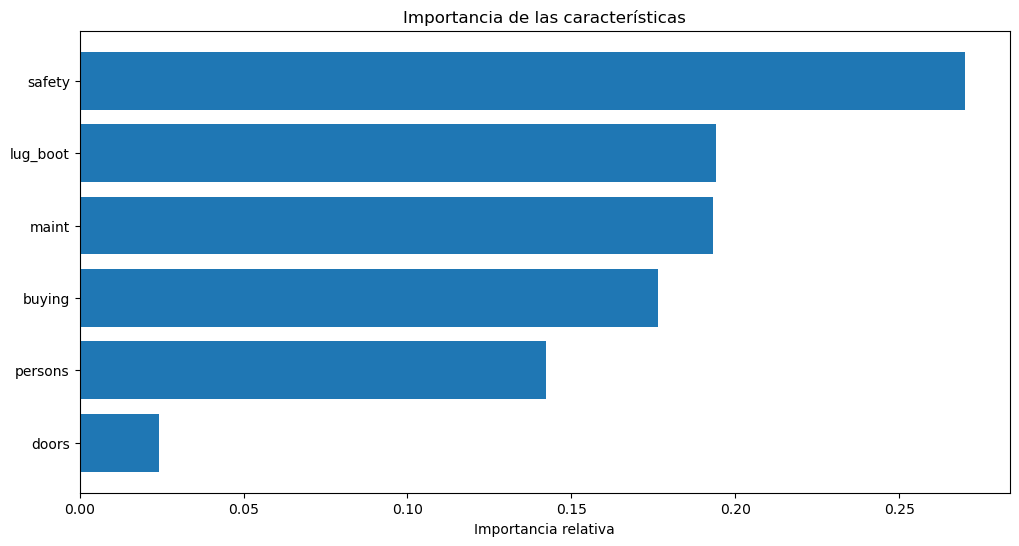

In [16]:
#feature importance
feature_importance = modelo.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(12, 6))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Importancia relativa')
plt.title('Importancia de las características')
plt.show()

Del feature importance es posible determinar que para el modelo decision trees la variable con mas impacto a la hora de predecir una muestra el la seguridad del carro

### Predicción de un registro

In [71]:
#generemos la predicción de un registro aleatorio, primero seleccionamos el registro 2 de X_test y lo imprimo
print(X_test.iloc[0])
#Luego generamos la predicción con la siguiente aclaración si es 1 es un auto inaceptable, si es 2 es aceptable, si es 3 es bueno y si es 4 es muy bueno
print(modelo.predict([X_test.iloc[0]]))


buying      1
maint       4
doors       1
persons     3
lug_boot    2
safety      2
Name: 1318, dtype: int64
[2]


### Estadisticos de Validación

In [19]:
y_pred = modelo.predict(X_test)
print(f"Reporte del modelo:\n {classification_report(y_test, y_pred, zero_division=0)}")

Reporte del modelo:
               precision    recall  f1-score   support

           1       0.99      1.00      0.99       363
           2       0.98      0.88      0.93       115
           3       0.74      0.92      0.82        25
           4       0.89      1.00      0.94        16

    accuracy                           0.97       519
   macro avg       0.90      0.95      0.92       519
weighted avg       0.97      0.97      0.97       519



El modelo tiene un accuracy muy bueno, no obstante podemos destacar 2 cosas, la primera es que la capacidad para catalogar un valor de la clase numero 2 es un poco mas deficiente que la de las demás clases, por otro lado tambien tiene problemas prediciendo de manera correcta los valores de la clase 3 aunque su detección de valores de esa clase es decente.

### Matriz de confusión

In [156]:
# Matriz de confusión
y_pred = modelo.predict(X_test)
print(f"Matriz de consfusion:\n {confusion_matrix(y_test, y_pred)}")

Matriz de consfusion:
 [[362   1   0   0]
 [  5 101   8   1]
 [  0   1  23   1]
 [  0   0   0  16]]


Observando en detalle la matriz de confusión podemos ver que de 115 valores de la clase 2 el modelo fallo catalogando 14 valores corroborando lo que destacabamos antes, asi como la clase número 3 que predijo que 8 de los valores de la clase 2 eran de la clase 3 afectando notoriamente su precisión

### Curvas de aprendizaje

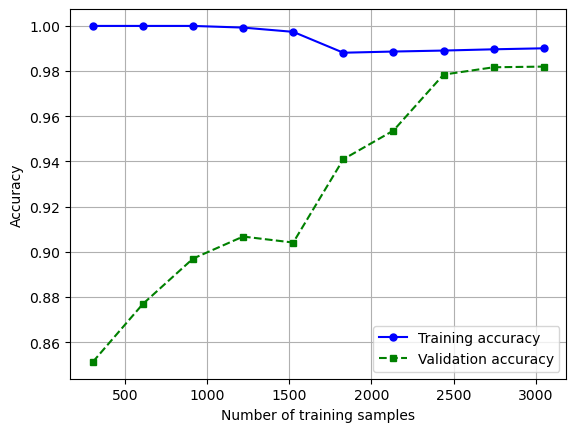

In [155]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator=modelo,X=X_train,y=y_train,train_sizes=np.linspace(0.1, 1.0, 10),cv=10,n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation accuracy')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

De las curvas de aprendizaje pódemos decir que el training accuracy decrece a las 1500 muestras aproximadamente, esto no es necesariamente un signo de preocupación, sino todo lo opuesto, ya que podriamos intuir que nuestro modelo llego a un punto donde puede predecir adecuadamente y no demuestra signos de overfitting ni underfitting, además de que el gap entre la curva de entrenamiento y vladiación es minima, de solo un 2% corroborando lo ya antes mencionado respecto al fitting del modelo.

# Random forest

### Grid Search

In [75]:
#Gridsearch para encontrar los mejores hiperparámetros para el modelo de random forest
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Definir los hiperparámetros
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15, 20, 25, 30],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 5, 10, 15]
}

# Inicializar el modelo
rf = RandomForestClassifier(random_state=0)

# Inicializar GridSearch
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Entrenar el modelo
grid_search.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros
grid_search.best_params_

Fitting 5 folds for each of 1500 candidates, totalling 7500 fits


{'criterion': 'entropy',
 'max_depth': 15,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 100}

### Creación del modelo

In [76]:

# instancio el modelo
modelo_rf = RandomForestClassifier(n_estimators=100,criterion='entropy' ,random_state=0, max_depth=15 ,min_samples_leaf=1, min_samples_split=5)

# Entrenar el modelo
modelo_rf.fit(X_train, y_train)

# Evaluar el modelo
y_rf_pred = modelo_rf.predict(X_test)
print(f"Exactitud del modelo: {accuracy_score(y_test, y_rf_pred):.2f}")

Exactitud del modelo: 0.96


### feature importance

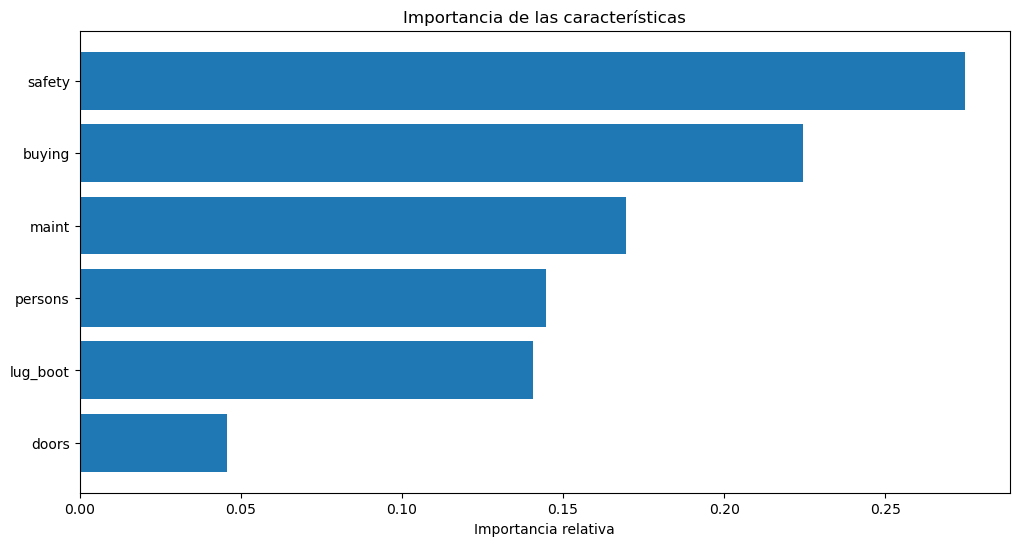

In [77]:
#feature importance
feature_importance = modelo_rf.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(12, 6))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Importancia relativa')
plt.title('Importancia de las características')
plt.show()

Del feature importance se evidencia que la clase safety es la mas importante, de manera similar al modelo de decision tree

### Estadisticos de validación

In [82]:
y_rf_pred = modelo_rf.predict(X_test)
print(f"Reporte del modelo:\n {classification_report(y_test, y_rf_pred, zero_division=0)}")

Reporte del modelo:
               precision    recall  f1-score   support

           1       1.00      0.98      0.99       363
           2       0.90      0.91      0.91       115
           3       0.71      0.88      0.79        25
           4       0.88      0.94      0.91        16

    accuracy                           0.96       519
   macro avg       0.87      0.93      0.90       519
weighted avg       0.96      0.96      0.96       519



De los estadisticos podemos ver que este modelo tiene dificultad tambien prediciendo adecuadamente si un valor pertenece a la clase número 3, tambien se puede decir la clasificación de muestras en la clase 3 tampoco es tan buena aunque puede ser aceptable

In [28]:
# Evaluar el modelo
y_rf_pred = modelo_rf.predict(X_test)
print(f"Matriz de consfusion:\n {confusion_matrix(y_test, y_rf_pred)}")

Matriz de consfusion:
 [[353  10   0   0]
 [  0 105   9   1]
 [  0   1  23   1]
 [  0   2   0  14]]


Justo como se evidenció en los estadisticos el modelo clasifico 9 muestras de la clase 2 como clase 3 de ahi su 71% en precisión, por otro lado solo tuvo 2 errores de catalogación uno en la clase 2 y otro en la clase 4, no obstante son muy pocos como para determinar si el recall no es realmente funcional

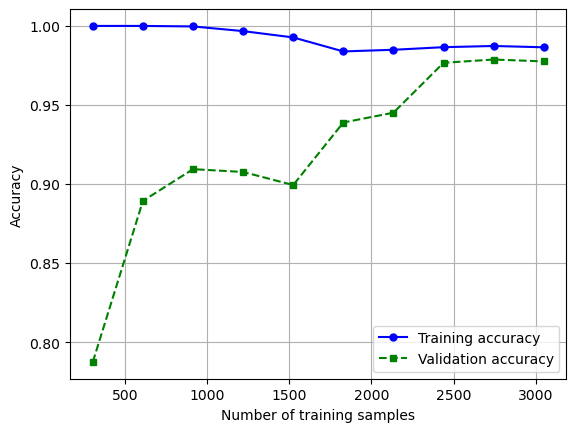

In [29]:
train_sizes, train_scores, test_scores = learning_curve(estimator=modelo_rf,X=X_train,y=y_train,train_sizes=np.linspace(0.1, 1.0, 10),cv=10,n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation accuracy')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

Las curvas de aprendizaje muestran un comportamiento generalmente bueno, se evidencia un comportamiento similar al de decision trees, no se ven indicios de over o under fitting, por lo que es un buen modelo

### PR Curves

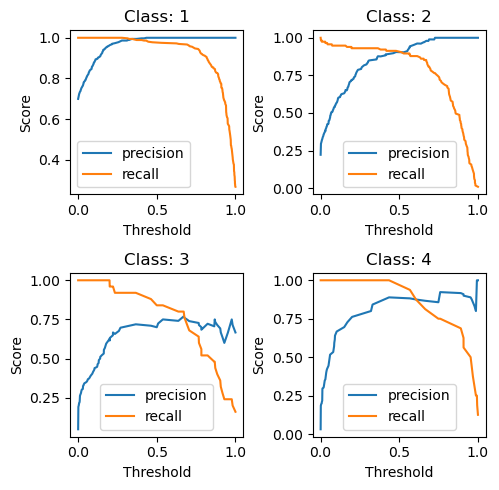

In [91]:
#Curvas de precision-recall
#Calculo las probabilidades de las predicciones
y_model_prob= modelo_rf.predict_proba(X_test)
#print(y_model_prob)
#Calculo las curvas de precision-recall
classes = [0, 1, 2, 3]  
fig, axs = plt.subplots(2, 2, figsize=(5, 5))
#Itero sobre las clases de la variable objetivo
for idx, class_value in enumerate(classes):
    #Calculo la fila y columna de la gráfica
    row = idx // 2
    col = idx % 2
    #Calculo la probabilidad de la clase
    t_model_class = y_model_prob[:, class_value]
    #Asigno la clase a la variable objetivo
    y_test_class = y_test == class_value+1
    #Genero los valores de precision, recall y thresholds
    precision, recall, thresholds = precision_recall_curve(y_test_class, t_model_class)
    # print("Class:", class_value)
    # print("Precision:", precision[:5])
    # print("Recall:", recall[:5])
    # print("Thresholds:", thresholds[:5])
    # creo los gráficos para cada clase
    axs[row, col].plot(thresholds, precision[:-1], label='precision')
    axs[row, col].plot(thresholds, recall[:-1], label='recall')
    axs[row, col].set_xlabel('Threshold')
    axs[row, col].set_ylabel('Score')
    axs[row, col].legend()
    axs[row, col].set_title(f'Class: {class_value+1}')
plt.tight_layout()
plt.show()

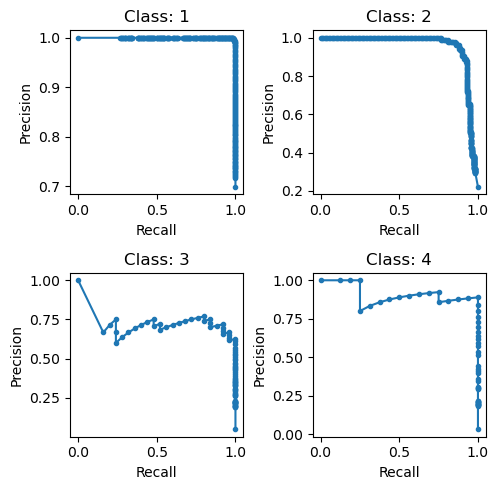

In [89]:
classes = [0, 1, 2, 3]  
fig, axs = plt.subplots(2, 2, figsize=(5, 5))

for idx, class_value in enumerate(classes):
    row = idx // 2
    col = idx % 2
    t_model_class = y_model_prob[:, class_value]
    y_test_class = y_test == class_value+1
    precision, recall, thresholds = precision_recall_curve(y_test_class, t_model_class)

    axs[row, col].plot(recall, precision, marker='.')
    axs[row, col].set_xlabel('Recall')
    axs[row, col].set_ylabel('Precision')
    axs[row, col].set_title(f'Class: {class_value+1}')

plt.tight_layout()
plt.show()

Finalmente la  generación de las curvas nos ayuda a ver de una manera más entendible la relación entre Precision y recall, y basados en estos gráficos podemos decir que este modelo es muy bueno para clasifica ry predecir valores de la clase 1 e incluso la clase 2, no obstante tiene grandes fallos en la clasificación de valores de la clase 3 y tambien un poco en la clase cuatro

Por lo tanto podemos decir que por el momento el modelo de desicion trees es mucho más confiable

# Regresión logística

### Grid Search

In [96]:
#Gridsearch para encontrar los mejores hiperparámetros para el modelo de regresión logística
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Definir los hiperparámetros
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'],
}

# Inicializar el modelo
lr = LogisticRegression(random_state=0)

# Inicializar GridSearch
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Entrenar el modelo
grid_search.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros
grid_search.best_params_

Fitting 5 folds for each of 140 candidates, totalling 700 fits


{'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}

### Creación del modelo

In [97]:
## Regresón Logistica
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

modelo_lr = LogisticRegression(random_state=0, C=1, penalty='l2', solver='lbfgs')
modelo_lr.fit(X_train_scaled, y_train)

## Predicción

y_lr_pred = modelo_lr.predict(X_test_scaled)

## Evaluación

print(f"Exactitud del modelo: {accuracy_score(y_test, y_lr_pred):.2f}")

Exactitud del modelo: 0.79


Para la creación de este modelo particularmente se hizo uso de la librería standard scaler, la razón de esto es que los modelos lineales se comportan mucho mejor cuando sus datos están en una escala similar

### Estadisticos de validación

In [98]:
y_lr_pred = modelo_lr.predict(X_test_scaled)
print(f"Reporte del modelo:\n {classification_report(y_test, y_lr_pred, zero_division=0)}")

Reporte del modelo:
               precision    recall  f1-score   support

           1       0.97      0.79      0.87       363
           2       0.61      0.78      0.69       115
           3       0.41      0.80      0.54        25
           4       0.57      1.00      0.73        16

    accuracy                           0.79       519
   macro avg       0.64      0.84      0.71       519
weighted avg       0.85      0.79      0.81       519



De los estadisticos de validación podemos decir que la regresión logistica no es un modelo "bueno" para realizar predicciones para nuestro dataset, en general las clases tienen una preción bastante mala, exceptuando a la clase 1, además tampoco destaca por el recall viedo el f1-score, tenemos un desbalance grande, además el accuracy tampoco es muy bueno, no recomendaria usar este modelo para este tipo de clasificación

### Matriz de confusión

In [32]:
# Matriz de confusión
y_lr_pred = modelo_lr.predict(X_test_scaled)
print(f"Matriz de consfusion:\n {confusion_matrix(y_test, y_lr_pred)}")

Matriz de consfusion:
 [[285  54  19   5]
 [ 10  90  10   5]
 [  0   3  20   2]
 [  0   0   0  16]]


La matriz nos muestra el comportamiendo destacado mas arriba, no hay muchos comentarios adicionales

### Learning curves

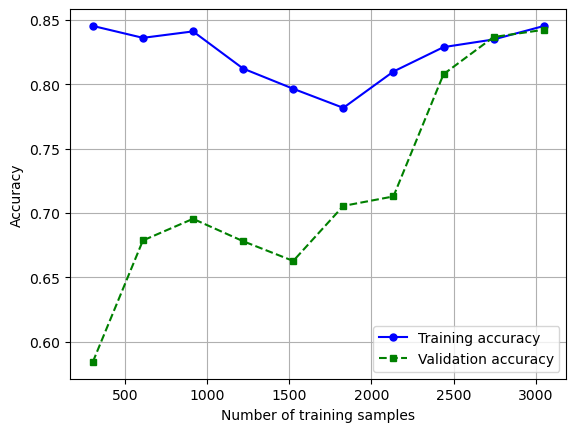

In [110]:
train_sizes, train_scores, test_scores = learning_curve(estimator=modelo_lr,X=X_train_scaled,y=y_train,train_sizes=np.linspace(0.1, 1.0, 10),cv=10,n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation accuracy')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

La curva de aprendizaje es bastante buena, aunque solo demuestra que no hay over o underfitting

### PR Curves

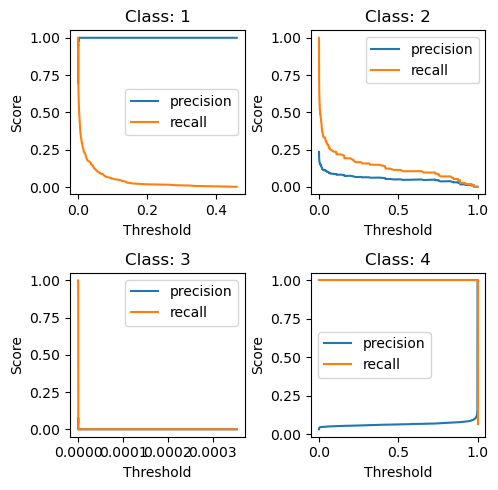

In [103]:
#Curvas de precision-recall
#Calculo las probabilidades de las predicciones
y_model_prob= modelo_lr.predict_proba(X_test)
#print(y_model_prob)
#Calculo las curvas de precision-recall
classes = [0, 1, 2, 3]  
fig, axs = plt.subplots(2, 2, figsize=(5, 5))
#Itero sobre las clases de la variable objetivo
for idx, class_value in enumerate(classes):
    #Calculo la fila y columna de la gráfica
    row = idx // 2
    col = idx % 2
    #Calculo la probabilidad de la clase
    t_model_class = y_model_prob[:, class_value]
    #Asigno la clase a la variable objetivo
    y_test_class = y_test == class_value+1
    #Genero los valores de precision, recall y thresholds
    precision, recall, thresholds = precision_recall_curve(y_test_class, t_model_class)
    # print("Class:", class_value)
    # print("Precision:", precision[:5])
    # print("Recall:", recall[:5])
    # print("Thresholds:", thresholds[:5])
    # creo los gráficos para cada clase
    axs[row, col].plot(thresholds, precision[:-1], label='precision')
    axs[row, col].plot(thresholds, recall[:-1], label='recall')
    axs[row, col].set_xlabel('Threshold')
    axs[row, col].set_ylabel('Score')
    axs[row, col].legend()
    axs[row, col].set_title(f'Class: {class_value+1}')
plt.tight_layout()
plt.show()

### PR-AUC

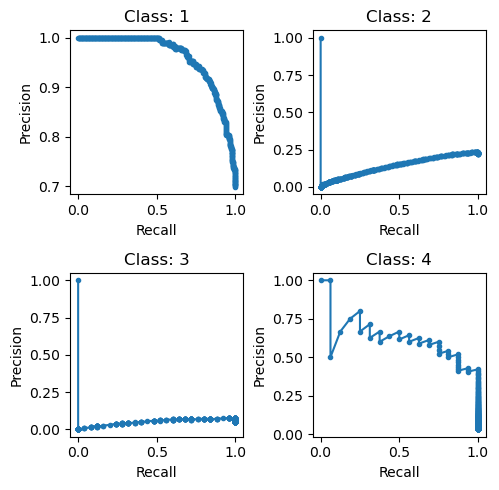

In [101]:
classes = [0, 1, 2, 3]  
fig, axs = plt.subplots(2, 2, figsize=(5, 5))

for idx, class_value in enumerate(classes):
    row = idx // 2
    col = idx % 2
    t_model_class = y_model_prob[:, class_value]
    y_test_class = y_test == class_value+1
    precision, recall, thresholds = precision_recall_curve(y_test_class, t_model_class)

    axs[row, col].plot(recall, precision, marker='.')
    axs[row, col].set_xlabel('Recall')
    axs[row, col].set_ylabel('Precision')
    axs[row, col].set_title(f'Class: {class_value+1}')

plt.tight_layout()
plt.show()

Es evidenciable en las curvas de PR y PR-AUC que el modelo no es óptimo para su uso, por el momento decision trees sigue siendo el mejor modelo

# KNeigbors

### Grid Search

In [105]:
#Gridsearch para encontrar los mejores hiperparámetros para el modelo de Kneighbors
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Definir los hiperparámetros
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski', 'chebyshev', 'seuclidean', 'mahalanobis', 'wminkowski', 'hamming', 'canberra', 'braycurtis', 'matching', 'jaccard', 'dice', 'kulsinski', 'rogerstanimoto', 'russellrao', 'sokalmichener', 'sokalsneath', 'yule']
}

# Inicializar el modelo
knn = KNeighborsClassifier()

# Inicializar GridSearch
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Entrenar el modelo
grid_search.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros
grid_search.best_params_

Fitting 5 folds for each of 190 candidates, totalling 950 fits


{'metric': 'canberra', 'n_neighbors': 3, 'weights': 'distance'}

### Creación del modelo

In [106]:
## KNN

model_knn = KNeighborsClassifier(n_neighbors=3, metric='canberra', weights='distance')

model_knn.fit(X_train, y_train)

## Predicción

y_knn_pred = model_knn.predict(X_test)

## Evaluación

print(f"Exactitud del modelo: {accuracy_score(y_test, y_knn_pred):.2f}")

Exactitud del modelo: 0.88


### Feature importance

In [ ]:
#feature importance
feature_importance = modelo.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(12, 6))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Importancia relativa')
plt.title('Importancia de las características')
plt.show()

### Estadisticos de validación

In [107]:
print(f"Reporte del modelo:\n {classification_report(y_test, y_knn_pred, zero_division=0)}")

Reporte del modelo:
               precision    recall  f1-score   support

           1       0.98      0.90      0.94       363
           2       0.70      0.83      0.76       115
           3       0.65      0.80      0.71        25
           4       0.69      0.69      0.69        16

    accuracy                           0.88       519
   macro avg       0.75      0.81      0.78       519
weighted avg       0.89      0.88      0.88       519



De este modelo se destaca la clase numero 1 por su habilidad de predecir valores de la clase 1, no obstante todas las demás metricas para las otras clases son lo suficientemente buenas para ser un modelo a tener en cuenta, aún así lo voy a corroborar con las demás medidas

### Matriz de confusión

In [108]:
# Matriz de confusión
print(f"Matriz de consfusion:\n {confusion_matrix(y_test, y_knn_pred)}")

Matriz de consfusion:
 [[328  34   1   0]
 [  6  96  10   3]
 [  0   3  20   2]
 [  0   5   0  11]]


Revisamos el comportamiento antes descrito

### Learning curves

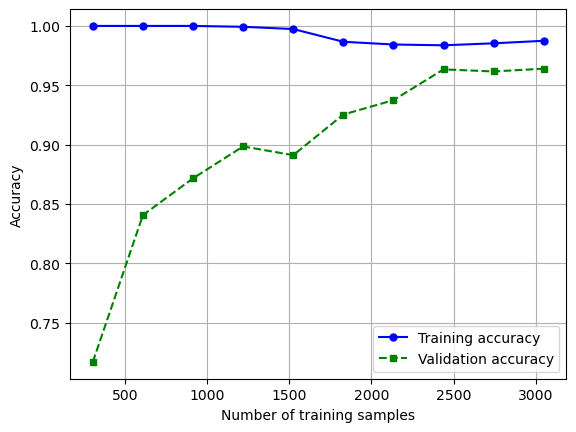

In [109]:
train_sizes, train_scores, test_scores = learning_curve(estimator=model_knn,X=X_train,y=y_train,train_sizes=np.linspace(0.1, 1.0, 10),cv=10,n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation accuracy')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

El modelo tiene una curva de aprendizaje aceptable, no hay señales de over o under fitting

### PR Curves

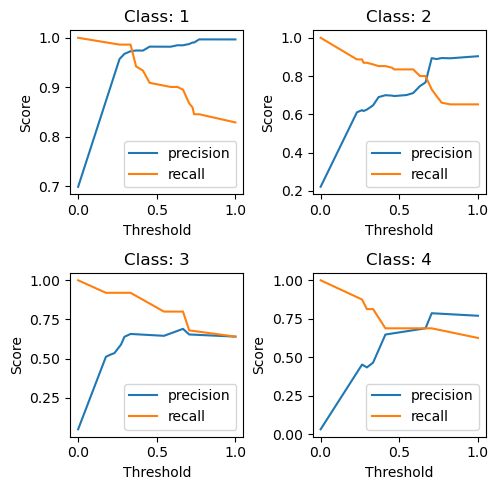

In [114]:
#Curvas de precision-recall
#Calculo las probabilidades de las predicciones
y_model_prob= model_knn.predict_proba(X_test)
#print(y_model_prob)
#Calculo las curvas de precision-recall
classes = [0, 1, 2, 3]  
fig, axs = plt.subplots(2, 2, figsize=(5, 5))
#Itero sobre las clases de la variable objetivo
for idx, class_value in enumerate(classes):
    #Calculo la fila y columna de la gráfica
    row = idx // 2
    col = idx % 2
    #Calculo la probabilidad de la clase
    t_model_class = y_model_prob[:, class_value]
    #Asigno la clase a la variable objetivo
    y_test_class = y_test == class_value+1
    #Genero los valores de precision, recall y thresholds
    precision, recall, thresholds = precision_recall_curve(y_test_class, t_model_class)
    # print("Class:", class_value)
    # print("Precision:", precision[:5])
    # print("Recall:", recall[:5])
    # print("Thresholds:", thresholds[:5])
    # creo los gráficos para cada clase
    axs[row, col].plot(thresholds, precision[:-1], label='precision')
    axs[row, col].plot(thresholds, recall[:-1], label='recall')
    axs[row, col].set_xlabel('Threshold')
    axs[row, col].set_ylabel('Score')
    axs[row, col].legend()
    axs[row, col].set_title(f'Class: {class_value+1}')
plt.tight_layout()
plt.show()

### PR-AUC

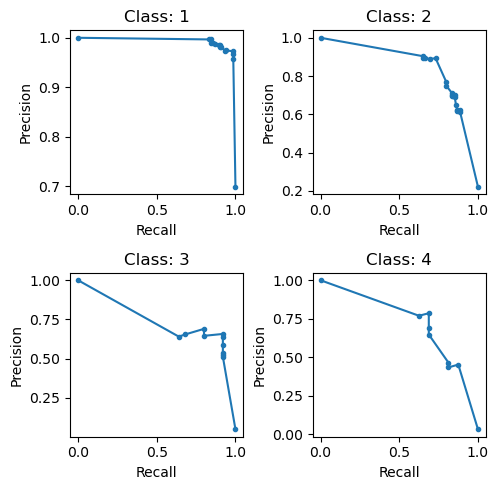

In [112]:
classes = [0, 1, 2, 3]  
fig, axs = plt.subplots(2, 2, figsize=(5, 5))

for idx, class_value in enumerate(classes):
    row = idx // 2
    col = idx % 2
    t_model_class = y_model_prob[:, class_value]
    y_test_class = y_test == class_value+1
    precision, recall, thresholds = precision_recall_curve(y_test_class, t_model_class)

    axs[row, col].plot(recall, precision, marker='.')
    axs[row, col].set_xlabel('Recall')
    axs[row, col].set_ylabel('Precision')
    axs[row, col].set_title(f'Class: {class_value+1}')

plt.tight_layout()
plt.show()

De las curvas de precision recall se evidencia que solo la clase 1 podría llegar a ser predicida ligeramente bien, aún así sigue siendo mejor el modelo de decision trees

# SVC

### Grid Search

In [113]:
#Gridsearch para encontrar los mejores hiperparámetros para el modelo de SVC
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Definir los hiperparámetros
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4, 5, 6],
    'gamma': ['scale', 'auto']
}

# Inicializar el modelo
svc = SVC()

# Inicializar GridSearch
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Entrenar el modelo
grid_search.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros
grid_search.best_params_

Fitting 5 folds for each of 280 candidates, totalling 1400 fits


{'C': 100, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}

### Creación del modelo

In [121]:
## Ahora clasificación con SVC

model_svc = SVC(kernel='rbf', C=100, random_state=0, degree=2, gamma='auto',probability=True)

model_svc.fit(X_train, y_train)

## Predicción

y_svc_pred = model_svc.predict(X_test)

## Evaluación

print(f"Exactitud del modelo: {accuracy_score(y_test, y_svc_pred):.2f}")

Exactitud del modelo: 0.97


### Estadisticos de validación

In [122]:
y_svc_pred = model_svc.predict(X_test)
print(f"Reporte del modelo:\n {classification_report(y_test, y_svc_pred, zero_division=0)}")

Reporte del modelo:
               precision    recall  f1-score   support

           1       1.00      0.99      1.00       363
           2       0.96      0.92      0.94       115
           3       0.73      0.88      0.80        25
           4       0.89      1.00      0.94        16

    accuracy                           0.97       519
   macro avg       0.90      0.95      0.92       519
weighted avg       0.98      0.97      0.97       519



Este modelo tiene un accuracy muy bueno, equiparable al de decision trees, su pasidad para clasificar las clases es buena, con excepción de la clase 3, de la misma forma las predicciones que realiza para todas las clases exceptuando la clase 3 son decentes

### Matriz de confusión

In [123]:
# Evaluar el modelo
y_svc_pred = model_svc.predict(X_test)
print(f"Matriz de consfusion:\n {confusion_matrix(y_test, y_svc_pred)}")

Matriz de consfusion:
 [[361   2   0   0]
 [  0 106   8   1]
 [  0   2  22   1]
 [  0   0   0  16]]


Soporte de lo dicho anteriormente

### Learning curves

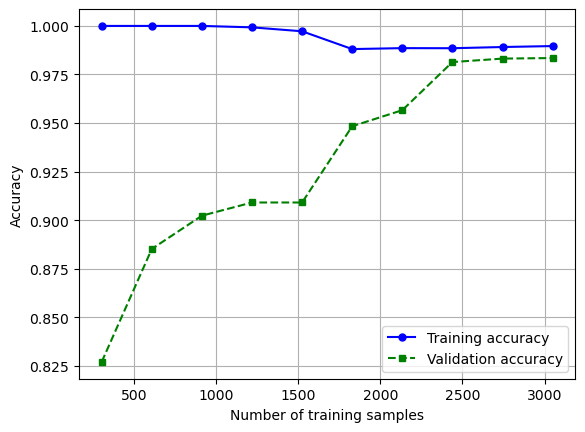

In [124]:
train_sizes, train_scores, test_scores = learning_curve(estimator=model_svc,X=X_train,y=y_train,train_sizes=np.linspace(0.1, 1.0, 10),cv=10,n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation accuracy')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

La curva de aprendizaje del modelo es buena, no se evidencia over ni under fitting

### PR Curves

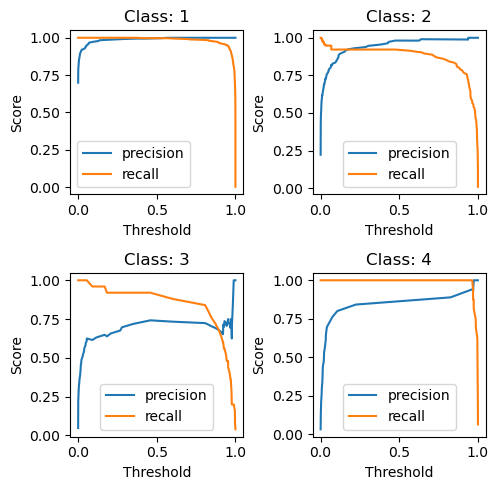

In [125]:
#Curvas de precision-recall
#Calculo las probabilidades de las predicciones
y_model_prob= model_svc.predict_proba(X_test)
#print(y_model_prob)
#Calculo las curvas de precision-recall
classes = [0, 1, 2, 3]  
fig, axs = plt.subplots(2, 2, figsize=(5, 5))
#Itero sobre las clases de la variable objetivo
for idx, class_value in enumerate(classes):
    #Calculo la fila y columna de la gráfica
    row = idx // 2
    col = idx % 2
    #Calculo la probabilidad de la clase
    t_model_class = y_model_prob[:, class_value]
    #Asigno la clase a la variable objetivo
    y_test_class = y_test == class_value+1
    #Genero los valores de precision, recall y thresholds
    precision, recall, thresholds = precision_recall_curve(y_test_class, t_model_class)
    # print("Class:", class_value)
    # print("Precision:", precision[:5])
    # print("Recall:", recall[:5])
    # print("Thresholds:", thresholds[:5])
    # creo los gráficos para cada clase
    axs[row, col].plot(thresholds, precision[:-1], label='precision')
    axs[row, col].plot(thresholds, recall[:-1], label='recall')
    axs[row, col].set_xlabel('Threshold')
    axs[row, col].set_ylabel('Score')
    axs[row, col].legend()
    axs[row, col].set_title(f'Class: {class_value+1}')
plt.tight_layout()
plt.show()

### PR-AUC

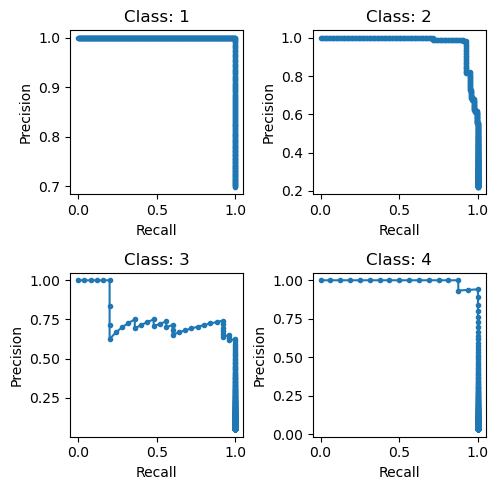

In [126]:
classes = [0, 1, 2, 3]  
fig, axs = plt.subplots(2, 2, figsize=(5, 5))

for idx, class_value in enumerate(classes):
    row = idx // 2
    col = idx % 2
    t_model_class = y_model_prob[:, class_value]
    y_test_class = y_test == class_value+1
    precision, recall, thresholds = precision_recall_curve(y_test_class, t_model_class)

    axs[row, col].plot(recall, precision, marker='.')
    axs[row, col].set_xlabel('Recall')
    axs[row, col].set_ylabel('Precision')
    axs[row, col].set_title(f'Class: {class_value+1}')

plt.tight_layout()
plt.show()

Podemos concluir que este es un modelo candidato a usar, aunque si decidiera elegir, elegiria aún decision trees por la complejidad de este modelo

# GaussianNB

### Grid Search

In [127]:
#Gridsearch para encontrar los mejores hiperparámetros para el modelo de GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

# Definir los hiperparámetros
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]
}

# Inicializar el modelo
gnb = GaussianNB()

# Inicializar GridSearch
grid_search = GridSearchCV(estimator=gnb, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Entrenar el modelo
grid_search.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros
grid_search.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


{'var_smoothing': 0.1}

### Creación del modelo

In [129]:
# Ejemplo de Implementación con Naive Bayes en scikit-learn

# Crear y entrenar el modelo Naive Bayes
model_gnb = GaussianNB(var_smoothing=1e-1)
model_gnb.fit(X_train, y_train)

# Realizar predicciones y evaluar el modelo
y_gnb_pred = model_gnb.predict(X_test)

# Evaluación

print(f"Exactitud del modelo: {accuracy_score(y_test, y_gnb_pred):.2f}")

Exactitud del modelo: 0.77


### Feature importance

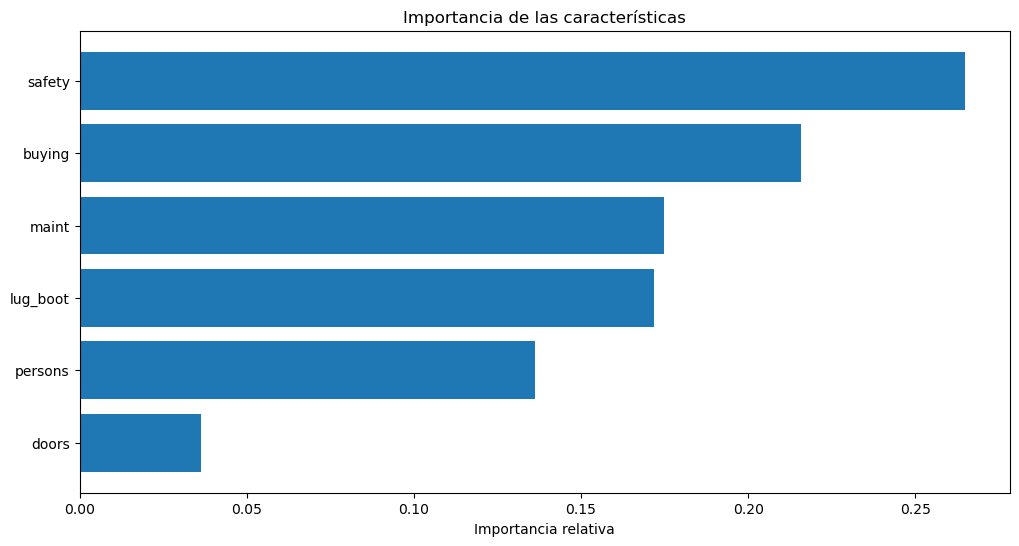

In [130]:
#feature importance
feature_importance = modelo.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(12, 6))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Importancia relativa')
plt.title('Importancia de las características')
plt.show()

De igual forma que en los otros modelos con feature importance safety es la caracteristica más importante

### Estadisticos de validación

In [131]:
print(f"Reporte del modelo:\n {classification_report(y_test, y_gnb_pred, zero_division=0)}")

Reporte del modelo:
               precision    recall  f1-score   support

           1       0.99      0.73      0.84       363
           2       0.60      0.85      0.71       115
           3       0.37      0.88      0.52        25
           4       0.52      1.00      0.68        16

    accuracy                           0.77       519
   macro avg       0.62      0.86      0.69       519
weighted avg       0.86      0.77      0.79       519



El modelo no es optimo para predecir la variable objetivo para este dataset, no se recomienda su uso en este caso

In [132]:
# Matriz de confusión
print(f"Matriz de consfusion:\n {confusion_matrix(y_test, y_gnb_pred)}")

Matriz de consfusion:
 [[264  65  25   9]
 [  2  98  12   3]
 [  0   0  22   3]
 [  0   0   0  16]]


Soporte de lo dicho anteriormente

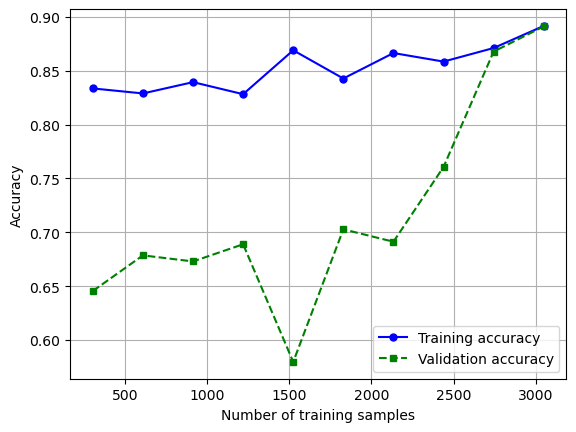

In [133]:
train_sizes, train_scores, test_scores = learning_curve(estimator=model_gnb,X=X_train,y=y_train,train_sizes=np.linspace(0.1, 1.0, 10),cv=10,n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation accuracy')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

La curva de aprendizaje parece estar en orden, tiene algunos picos, aunque conforme se brindan más muestras el entrenamiento comienza a mejorar, ambas lineas son muy cercanas por lo que no se evidencia over o under fitting

### PR Curves

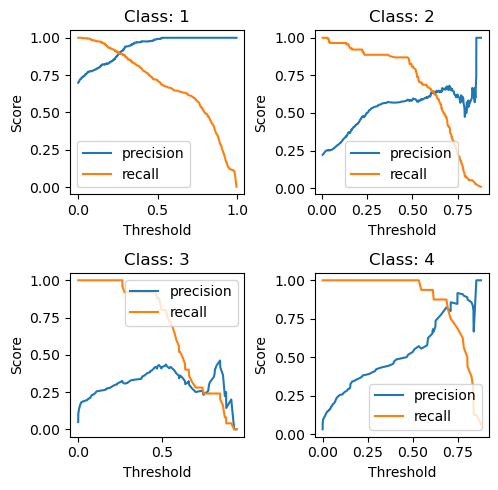

In [134]:
#Curvas de precision-recall
#Calculo las probabilidades de las predicciones
y_model_prob= model_gnb.predict_proba(X_test)
#print(y_model_prob)
#Calculo las curvas de precision-recall
classes = [0, 1, 2, 3]  
fig, axs = plt.subplots(2, 2, figsize=(5, 5))
#Itero sobre las clases de la variable objetivo
for idx, class_value in enumerate(classes):
    #Calculo la fila y columna de la gráfica
    row = idx // 2
    col = idx % 2
    #Calculo la probabilidad de la clase
    t_model_class = y_model_prob[:, class_value]
    #Asigno la clase a la variable objetivo
    y_test_class = y_test == class_value+1
    #Genero los valores de precision, recall y thresholds
    precision, recall, thresholds = precision_recall_curve(y_test_class, t_model_class)
    # print("Class:", class_value)
    # print("Precision:", precision[:5])
    # print("Recall:", recall[:5])
    # print("Thresholds:", thresholds[:5])
    # creo los gráficos para cada clase
    axs[row, col].plot(thresholds, precision[:-1], label='precision')
    axs[row, col].plot(thresholds, recall[:-1], label='recall')
    axs[row, col].set_xlabel('Threshold')
    axs[row, col].set_ylabel('Score')
    axs[row, col].legend()
    axs[row, col].set_title(f'Class: {class_value+1}')
plt.tight_layout()
plt.show()

### PR-AUC

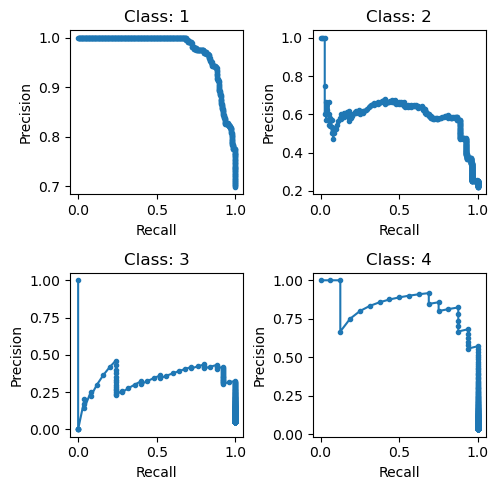

In [135]:
classes = [0, 1, 2, 3]  
fig, axs = plt.subplots(2, 2, figsize=(5, 5))

for idx, class_value in enumerate(classes):
    row = idx // 2
    col = idx % 2
    t_model_class = y_model_prob[:, class_value]
    y_test_class = y_test == class_value+1
    precision, recall, thresholds = precision_recall_curve(y_test_class, t_model_class)

    axs[row, col].plot(recall, precision, marker='.')
    axs[row, col].set_xlabel('Recall')
    axs[row, col].set_ylabel('Precision')
    axs[row, col].set_title(f'Class: {class_value+1}')

plt.tight_layout()
plt.show()

No se recomienda el uso de este modelo para la predicción de la variable objetivo, es mejor optar por el modelo decision trees o SVC

# Gradient boosting

### Grid Search

In [136]:
#Gridsearch para encontrar los mejores hiperparámetros para el modelo de gradient boosting
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

# Definir los hiperparámetros
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.001, 0.01, 0.1, 1],
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

# Inicializar el modelo
gbc = GradientBoostingClassifier()

# Inicializar GridSearch
grid_search = GridSearchCV(estimator=gbc, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Entrenar el modelo
grid_search.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros
grid_search.best_params_

Fitting 5 folds for each of 720 candidates, totalling 3600 fits


{'learning_rate': 1,
 'max_depth': 3,
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 500}

### Creación del modelo

In [137]:
## Implementación de gradient boosting

model_gbc = GradientBoostingClassifier(n_estimators=500, learning_rate=1, max_depth=3, random_state=0, min_samples_leaf=5, min_samples_split=10)

model_gbc.fit(X_train, y_train)

y_gbc_pred = model_gbc.predict(X_test)

print(f"Exactitud del modelo: {accuracy_score(y_test, y_gbc_pred):.2f}")

Exactitud del modelo: 0.97


### Feature importance

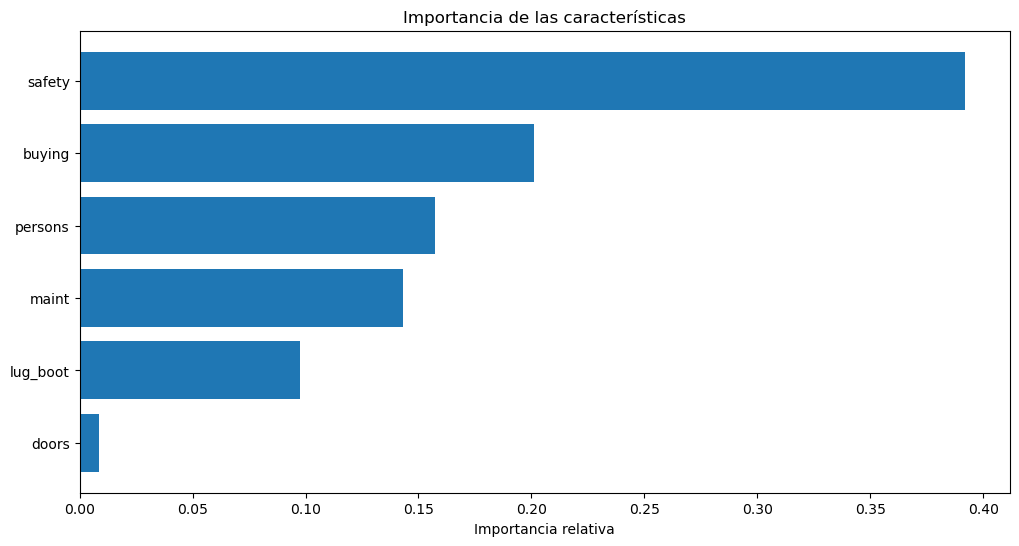

In [138]:
#feature importance
feature_importance = model_gbc.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(12, 6))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Importancia relativa')
plt.title('Importancia de las características')
plt.show()

Nuevamente vemos a la variable safety como la más importante

### Estadisticos de validación

In [139]:
print(f"Reporte del modelo:\n {classification_report(y_test, y_gbc_pred, zero_division=0)}")

Reporte del modelo:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00       363
           2       0.98      0.90      0.94       115
           3       0.69      0.88      0.77        25
           4       0.89      1.00      0.94        16

    accuracy                           0.97       519
   macro avg       0.89      0.95      0.91       519
weighted avg       0.98      0.97      0.97       519



Aunque el modelo tiene un accuracy equiparable a decision tree y SVM su capacidad de predicción para la clase 3 es menor que con los otros 2 modelos

In [140]:
# Evaluar el modelo
print(f"Matriz de consfusion:\n {confusion_matrix(y_test, y_gbc_pred)}")

Matriz de consfusion:
 [[363   0   0   0]
 [  0 104  10   1]
 [  0   2  22   1]
 [  0   0   0  16]]


Soporte de la clasificación y predicción de valores

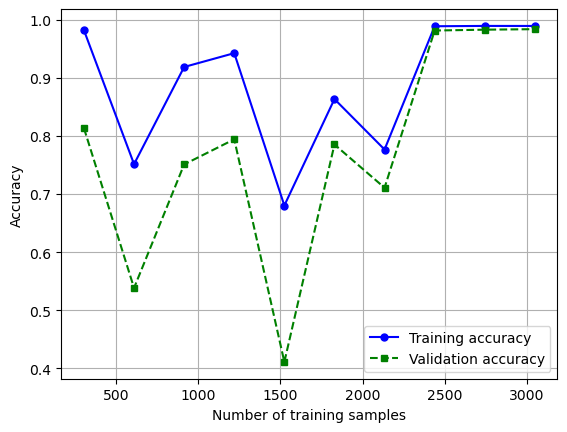

In [141]:
train_sizes, train_scores, test_scores = learning_curve(estimator=model_gbc,X=X_train,y=y_train,train_sizes=np.linspace(0.1, 1.0, 10),cv=10,n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation accuracy')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

La curva de aprendizaje demuestra un comportamiento adecuado, no muestra señales de Over o under fititng, por lo que se puede decir que es un buen modelo aunque presenta diversos picos a lo largo de su aprendizaje

### PR Curves

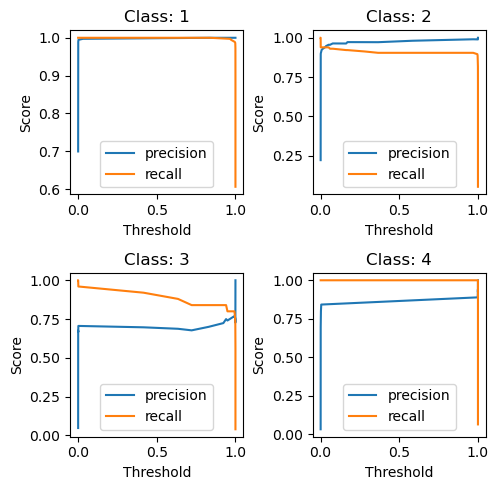

In [142]:
#Curvas de precision-recall
#Calculo las probabilidades de las predicciones
y_model_prob= model_gbc.predict_proba(X_test)
#print(y_model_prob)
#Calculo las curvas de precision-recall
classes = [0, 1, 2, 3]  
fig, axs = plt.subplots(2, 2, figsize=(5, 5))
#Itero sobre las clases de la variable objetivo
for idx, class_value in enumerate(classes):
    #Calculo la fila y columna de la gráfica
    row = idx // 2
    col = idx % 2
    #Calculo la probabilidad de la clase
    t_model_class = y_model_prob[:, class_value]
    #Asigno la clase a la variable objetivo
    y_test_class = y_test == class_value+1
    #Genero los valores de precision, recall y thresholds
    precision, recall, thresholds = precision_recall_curve(y_test_class, t_model_class)
    # print("Class:", class_value)
    # print("Precision:", precision[:5])
    # print("Recall:", recall[:5])
    # print("Thresholds:", thresholds[:5])
    # creo los gráficos para cada clase
    axs[row, col].plot(thresholds, precision[:-1], label='precision')
    axs[row, col].plot(thresholds, recall[:-1], label='recall')
    axs[row, col].set_xlabel('Threshold')
    axs[row, col].set_ylabel('Score')
    axs[row, col].legend()
    axs[row, col].set_title(f'Class: {class_value+1}')
plt.tight_layout()
plt.show()

### PR-AUC

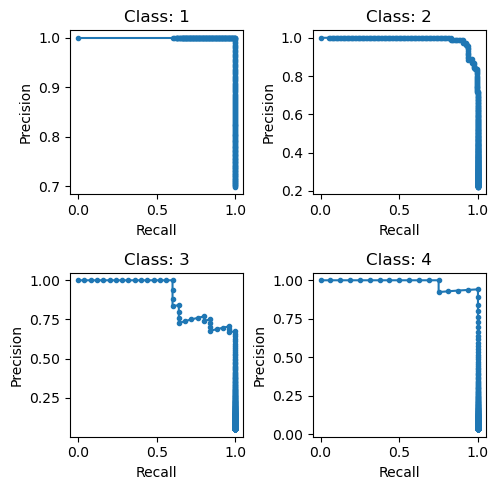

In [143]:
classes = [0, 1, 2, 3]  
fig, axs = plt.subplots(2, 2, figsize=(5, 5))

for idx, class_value in enumerate(classes):
    row = idx // 2
    col = idx % 2
    t_model_class = y_model_prob[:, class_value]
    y_test_class = y_test == class_value+1
    precision, recall, thresholds = precision_recall_curve(y_test_class, t_model_class)

    axs[row, col].plot(recall, precision, marker='.')
    axs[row, col].set_xlabel('Recall')
    axs[row, col].set_ylabel('Precision')
    axs[row, col].set_title(f'Class: {class_value+1}')

plt.tight_layout()
plt.show()

Algo muy destacable dentro e este modelo es su capacidad para clasificar y predecir los valores de la clase 1, hasta el momento el mejor modelo clasificando esta clase, por lo que sería muy recomendado si el enfoque es clasificar y predecir valores de la clase 1, además clasifica y predice bien los valores de la clase 2 y 4, para la clase 3 sigue teniendo algunas fallas, como la mayoria de los modelos

# Neural network

### Grid Search

In [144]:
#Gridsearch para encontrar los mejores hiperparámetros para el modelo de red neuronal
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

# Definir los hiperparámetros
param_grid = {
    'hidden_layer_sizes': [(100,), (100, 100), (100, 100, 100)],
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1],
    'learning_rate': ['constant', 'invscaling', 'adaptive']
}

# Inicializar el modelo
MLP = MLPClassifier()

# Inicializar GridSearch
grid_search = GridSearchCV(estimator=MLP, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Entrenar el modelo
grid_search.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros
grid_search.best_params_


Fitting 5 folds for each of 540 candidates, totalling 2700 fits


{'activation': 'tanh',
 'alpha': 0.1,
 'hidden_layer_sizes': (100, 100),
 'learning_rate': 'constant',
 'solver': 'lbfgs'}

### Creación del modelo

In [146]:
## Entrenamiento de una red neuronal

model_nn = MLPClassifier(solver='lbfgs', alpha=0.1, hidden_layer_sizes=(100, 100), random_state=1,learning_rate='constant', activation='tanh')

model_nn.fit(X_train, y_train)

y_nn_pred = model_nn.predict(X_test)

print(f"Exactitud del modelo: {accuracy_score(y_test, y_nn_pred):.2f}")

Exactitud del modelo: 0.96


### Estadisticos de validación

In [148]:
print(f"Reporte del modelo:\n {classification_report(y_test, y_nn_pred, zero_division=0)}")

Reporte del modelo:
               precision    recall  f1-score   support

           1       1.00      0.98      0.99       363
           2       0.93      0.91      0.92       115
           3       0.72      0.92      0.81        25
           4       0.89      1.00      0.94        16

    accuracy                           0.96       519
   macro avg       0.88      0.95      0.91       519
weighted avg       0.97      0.96      0.96       519



Se evidencia un accuracy muy bueno, aunque no superior a otros de los modelos vistos, al igual que los otros modelos su capacidad para predecir la clase 1,2 y 4 es bastante buena, no obstante su desempeño cae cuando se trata de predecir los valores de la clase 3, no obstante la clasificación de los valores de la clase 3 podría considerarse buena tambien

### Matriz de confusión

In [149]:
# Evaluar el modelo
print(f"Matriz de consfusion:\n {confusion_matrix(y_test, y_nn_pred)}")

Matriz de consfusion:
 [[356   7   0   0]
 [  0 105   9   1]
 [  0   1  23   1]
 [  0   0   0  16]]


Acá evidenciamos lo dicho previamente

### Learning Curves

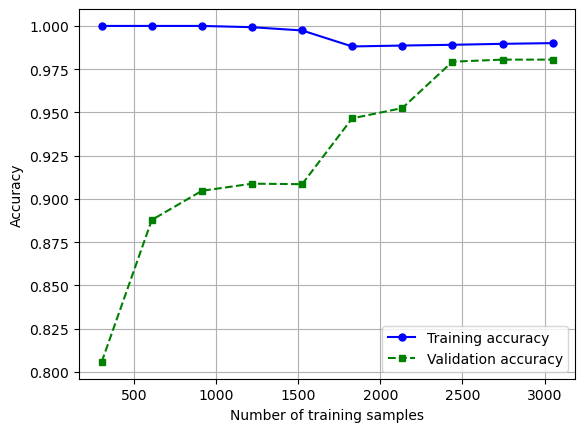

In [150]:
train_sizes, train_scores, test_scores = learning_curve(estimator=model_nn,X=X_train,y=y_train,train_sizes=np.linspace(0.1, 1.0, 10),cv=10,n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation accuracy')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

La curva de aprendizaje es buena, no muestra señales de over o under fitting

### PR Curves

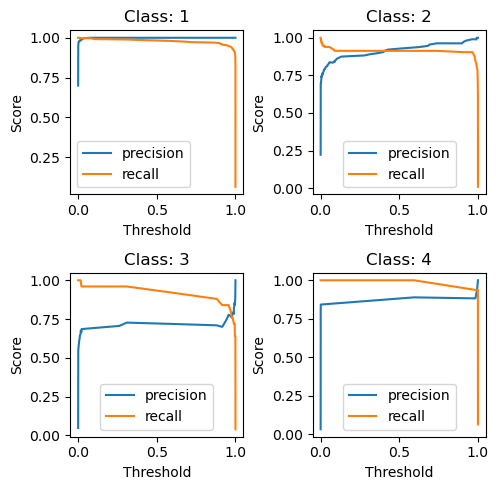

In [151]:
#Curvas de precision-recall
#Calculo las probabilidades de las predicciones
y_model_prob= model_nn.predict_proba(X_test)
#print(y_model_prob)
#Calculo las curvas de precision-recall
classes = [0, 1, 2, 3]  
fig, axs = plt.subplots(2, 2, figsize=(5, 5))
#Itero sobre las clases de la variable objetivo
for idx, class_value in enumerate(classes):
    #Calculo la fila y columna de la gráfica
    row = idx // 2
    col = idx % 2
    #Calculo la probabilidad de la clase
    t_model_class = y_model_prob[:, class_value]
    #Asigno la clase a la variable objetivo
    y_test_class = y_test == class_value+1
    #Genero los valores de precision, recall y thresholds
    precision, recall, thresholds = precision_recall_curve(y_test_class, t_model_class)
    # print("Class:", class_value)
    # print("Precision:", precision[:5])
    # print("Recall:", recall[:5])
    # print("Thresholds:", thresholds[:5])
    # creo los gráficos para cada clase
    axs[row, col].plot(thresholds, precision[:-1], label='precision')
    axs[row, col].plot(thresholds, recall[:-1], label='recall')
    axs[row, col].set_xlabel('Threshold')
    axs[row, col].set_ylabel('Score')
    axs[row, col].legend()
    axs[row, col].set_title(f'Class: {class_value+1}')
plt.tight_layout()
plt.show()

### PR-AUC

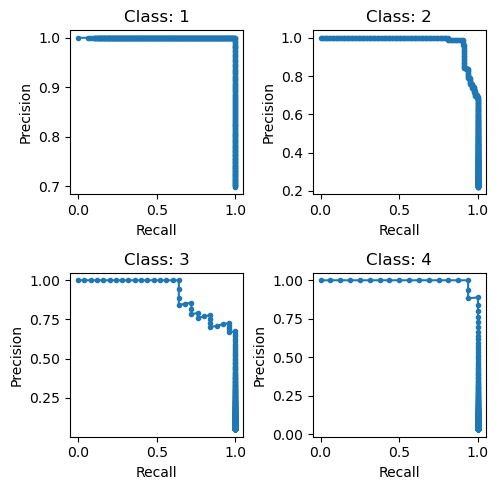

In [152]:
classes = [0, 1, 2, 3]  
fig, axs = plt.subplots(2, 2, figsize=(5, 5))

for idx, class_value in enumerate(classes):
    row = idx // 2
    col = idx % 2
    t_model_class = y_model_prob[:, class_value]
    y_test_class = y_test == class_value+1
    precision, recall, thresholds = precision_recall_curve(y_test_class, t_model_class)

    axs[row, col].plot(recall, precision, marker='.')
    axs[row, col].set_xlabel('Recall')
    axs[row, col].set_ylabel('Precision')
    axs[row, col].set_title(f'Class: {class_value+1}')

plt.tight_layout()
plt.show()

De las curvas de precision recall podemosa afirmar nuevamente que el modelo funciona de muy buena manera, no obstante tenemos mejores modelos a escoger

# Explicación final

¿Cuál de los modelos fue mejor?<br>
<br>
En mi opinión el mejor modelo para este caso es decision trees. Hubo 3 modelos con un accuracy de 97% y 2 con 96% siendo decision trees uno de los de 97% la razón por la cual escojo este sobre los otros se basa en 3 factores: velocidad, complejidad y consumo de recursos. El modelo de decision trees maneja una complejidad bastante simple lo que lo hace mas facil de mantener a largo plazo y tambien tiene menos probabilidades de mostrar overfitting en algún momento. Ahora hablado de su velocidad, siendo este un modelo sencillo el tiempo que demorará prediciendo valores será mucho menor al de los otros modelos, y a su vez esto requerira menos recursos para funcionar, lo cual lo ahce la opción idonea e ideal en esta situación. Y si quisieramos destacar otra razón más por la cual elegir este modelo sería su interpretabilidad, desicion trees nos aporta una manera muy sencilla de ver como función y es imprimiendo su arbol gráficamente, esto nos puede ayudar mucho en caso de quisieramos explicarlo o interpretar el por qué de su clasificación.